<a href="https://colab.research.google.com/github/harshitrajssss/Web-Application-for-Medical-Diagnosis-using-Streamlit/blob/main/Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/brain_tumor_dataset"

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

train_data_gen = ImageDataGenerator(validation_split=0.2, preprocessing_function=preprocess_input)

train_generator = train_data_gen.flow_from_directory(TRAIN_DIR,
                                                     target_size=(224, 224),
                                                     color_mode='rgb',
                                                     batch_size=32,
                                                     shuffle=True,
                                                     subset='training')

validation_generator = train_data_gen.flow_from_directory(TRAIN_DIR,
                                                          target_size=(224, 224),
                                                          color_mode='rgb',
                                                          batch_size=32,
                                                          shuffle=False,
                                                          subset='validation')

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
labels = train_generator.class_indices
class_mapping = dict((v, k) for k, v in labels.items())

In [ ]:
class_mapping

{0: 'no', 1: 'yes'}

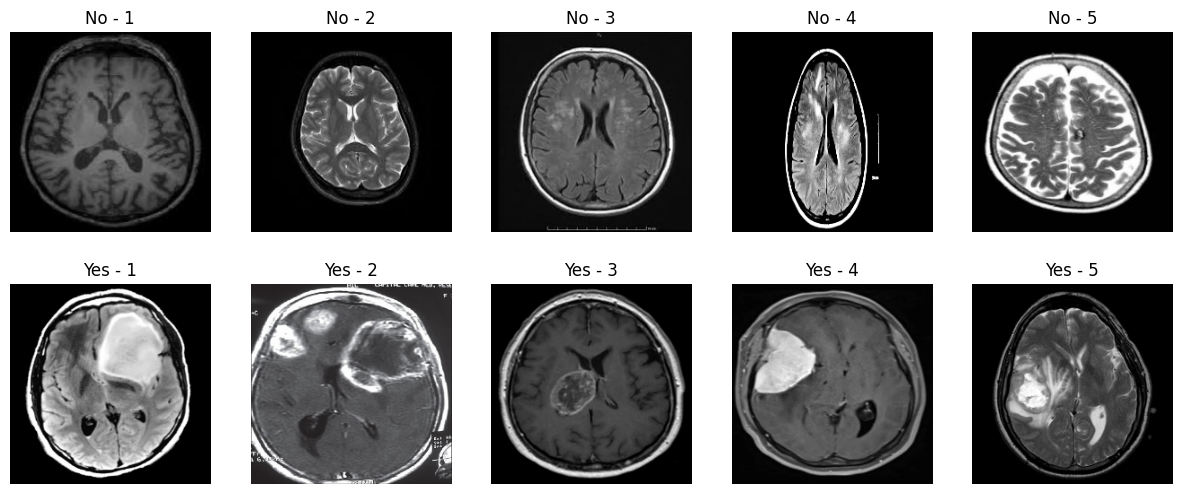

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_random_images(dataset_path, class_labels=('no', 'yes'), num_images=5):
    plt.figure(figsize=(15, 6))

    for class_label in class_labels:
        class_path = os.path.join(dataset_path, class_label)
        image_files = os.listdir(class_path)
        random_images = random.sample(image_files, num_images)

        for i, image_file in enumerate(random_images, start=1):
            plt.subplot(len(class_labels), num_images, (class_labels.index(class_label) * num_images) + i)

            img_path = os.path.join(class_path, image_file)
            img = mpimg.imread(img_path)
            img = cv2.resize(img, (224, 224))
            plt.imshow(img, cmap='gray')

            plt.axis('off')
            plt.title(f'{class_label.capitalize()} - {i}')

    plt.show()

dataset_path = '/content/drive/MyDrive/brain_tumor_dataset'
plot_random_images(dataset_path)


In [ ]:
from keras.applications import vgg16

img_rows, img_cols = 224, 224

vgg = vgg16.VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(img_rows, img_cols, 3))

for layer in vgg.layers:
  layer.trainable = False

for (i, layer) in enumerate(vgg.layers):
  print(str(i) + " " + layer.__class__.__name__, layer.trainable)

58889256/58889256 [==============================] - 1s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
def structure_model(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='sigmoid')(top_model)
    return top_model

In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

num_classes = 2

model_head = structure_model(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = model_head)


In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

train_cb = ModelCheckpoint('model/', save_best_only=True)

history = model.fit(train_generator, validation_data=validation_generator, callbacks=[train_cb], epochs=5)

Epoch 1/5
7/7 [==============================] - 40s 4s/step - loss: 0.6389 - accuracy: 0.6798 - val_loss: 0.4701 - val_accuracy: 0.7800
Epoch 2/5
7/7 [==============================] - 3s 522ms/step - loss: 0.3551 - accuracy: 0.8768 - val_loss: 0.3299 - val_accuracy: 0.8800
Epoch 3/5
7/7 [==============================] - 5s 755ms/step - loss: 0.2311 - accuracy: 0.9261 - val_loss: 0.2818 - val_accuracy: 0.9200
Epoch 4/5
7/7 [==============================] - 4s 518ms/step - loss: 0.1719 - accuracy: 0.9507 - val_loss: 0.2740 - val_accuracy: 0.9000
Epoch 5/5
7/7 [==============================] - 4s 570ms/step - loss: 0.1375 - accuracy: 0.9606 - val_loss: 0.2540 - val_accuracy: 0.9400


2/2 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.94      0.97      0.95        31

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50



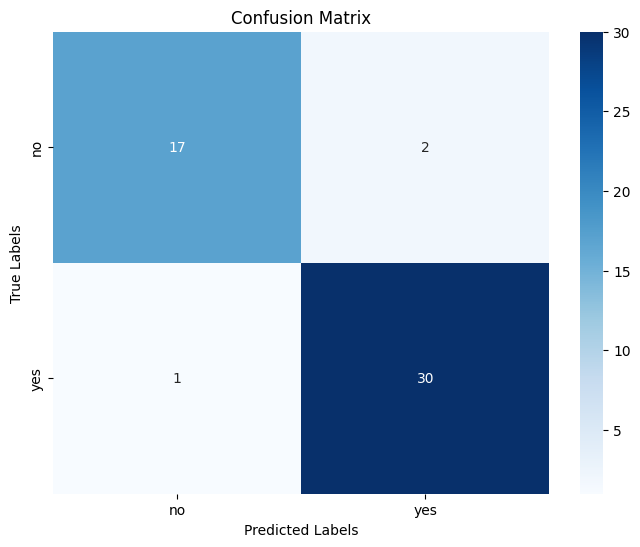

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

predictions = model.predict(validation_generator)

true_labels = validation_generator.classes

predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)
cr = classification_report(true_labels, predicted_labels)
print(cr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

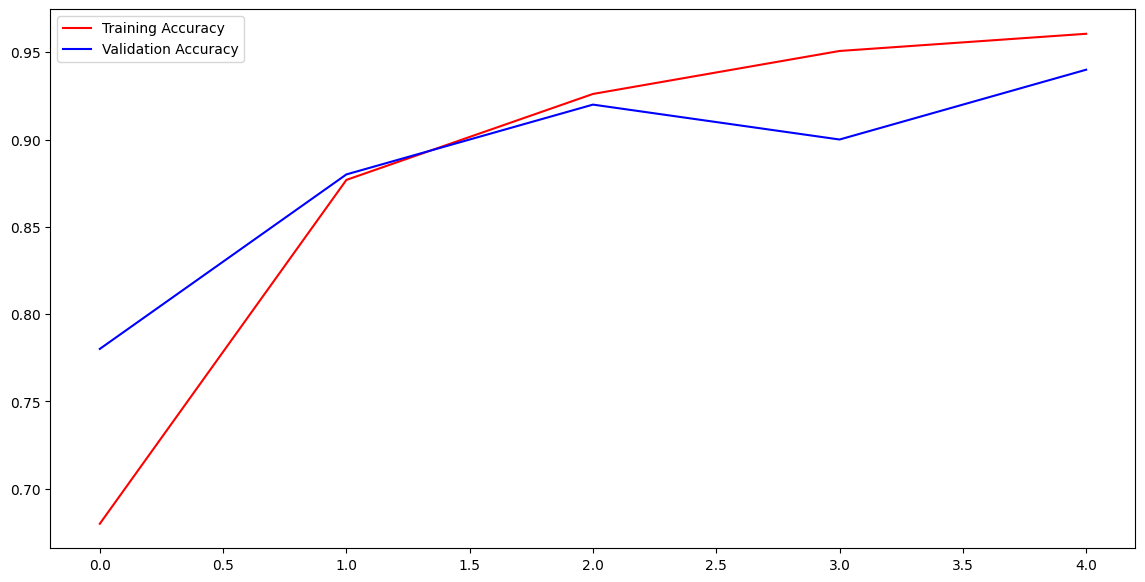

In [ ]:
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/brain_tumor_dataset/no/1 no.jpeg')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [ ]:
img_array = img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

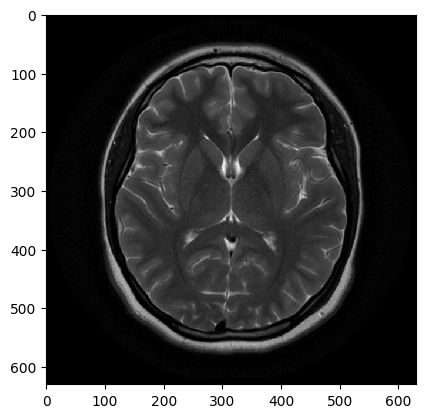

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/brain_tumor_dataset/no/1 no.jpeg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 1s 1s/step


0

In [ ]:

model.save('/content/drive/MyDrive/brain_tumor_model.h5')


In [ ]:
!pip install streamlit-option-menu==0.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.3/785.3 kB 8.3 MB/s eta 0:00:00
  Using cached streamlit-1.36.0-py2.py3-none-any.whl (8.6 MB)
  Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
  Using cached watchdog-4.0.1-py3-none-manylinux2014_x86_64.whl (83 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.19.46.25


In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/brain_tumor_model.h5')

# Define the class labels
class_labels = ['No Tumor', 'Tumor']

# Create the Streamlit app
st.title('Brain Tumor Classification')

# Upload an image file
uploaded_file = st.file_uploader("Choose an image file")

if uploaded_file is not None:
    # Convert the uploaded image to a PIL image
    image = Image.open(uploaded_file)

    # Resize the image to the model input size
    image = image.resize((224, 224))

    # Convert the image to a NumPy array
    image_array = np.array(image)
    image_array = np.array(image.convert('RGB'))


    # Reshape the image array to the model input format
    image_array = image_array.reshape(1, 224, 224, 3)

    # Normalize the image array
    image_array = image_array / 255.0

    # Make predictions using the model
    predictions = model.predict(image_array)

    # Get the predicted class label
    predicted_class = class_labels[np.argmax(predictions)]

    # Display the predicted class label
    st.write('Predicted Class:', predicted_class)

    # Display the uploaded image
    st.image(image, caption='Uploaded Image', use_column_width=True)


Overwriting app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.19.46.25:8501

npx: installed 22 in 5.636s
your url is: https://proud-humans-rest.loca.lt
2024-07-01 22:00:50.006333: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-01 22:00:50.006388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-01 22:00:50.007901: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-01 22:00:50.016123: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized